<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module6_Lab1_AIML_-/blob/main/MODULE6_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WHAT IS NEURAL NETWORK**


Neural networks are a set of algorithms inspired by the functioning of the human brain. When you open your eyes, the information you perceive, known as data, is processed by neurons, which are the data processing cells in your brain. These neurons recognize patterns in the data and enable you to identify and understand your surroundings.

**Building a Neural Network**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import random

In [3]:
iris = load_iris()
data, labels = iris.data[:,0:3], iris.data[:,3]

num_samples = len(labels)
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]

In [7]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x[:2])
w = [0.2, 0.8]
b = -0.4

X, y = data, labels

pred_y = [weighted_sum(x, w, b) for x in X]
print("for x=[%0.2f, %0.2f], predicted = %0.2f, actual = %0.2f" % (X[0][0], X[0][1], pred_y[0], y[0]))

for x=[5.80, 4.00], predicted = 3.96, actual = 0.20


In [8]:
def cost_function(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)

error = cost_function(pred_y, y)
print(error)

357.06680000000006


In [14]:
X = X / np.amax(X, axis=0)
y = y / np.amax(y, axis=0)

w, b = [random.random(), random.random()], random.random()

# Define the prediction function F
def F(X, w, b):
    # Ensure w has the same number of features as X
    w = np.array(w)  # Convert w to a NumPy array
    # Check if the number of weights matches the number of features
    if w.shape[0] != X.shape[1]:
        # If not, add weights or features to make them match
        diff = X.shape[1] - w.shape[0]
        if diff > 0:
            # Add more weights if needed, initialized to 0 to avoid affecting initial output too much
            w = np.concatenate([w, np.zeros(diff)])
        #else:  # Assuming you want to remove features if w has more weights
        #    X = X[:, :w.shape[0]]

    return np.sum(w * X, axis=1) + b

# Calculate initial predictions and cost
y_pred = F(X, w, b)
init_cost = cost_function(y_pred, y)
print("initial parameters: w1=%0.3f, w2=%0.3f, b=%0.3f" % (w[0], w[1], b))
print("initial cost = %0.3f" % init_cost)

initial parameters: w1=0.103, w2=0.460, b=0.967
initial cost = 65.937


In [10]:
def dJdw1(X, y, w, b):
    return -np.dot(X[:,0], y - F(X, w, b))

def dJdw2(X, y, w, b):
    return -np.dot(X[:,1], y - F(X, w, b))

def dJdb(X, y, w, b):
    return -np.sum(y - F(X, w, b))

In [15]:
lr = 0.002
n_iters = 3000

# run through gradient descent
errors = []
for i in range(n_iters):
    w[0] = w[0] - lr * dJdw1(X, y, w, b)
    w[1] = w[1] - lr * dJdw2(X, y, w, b)
    b = b - lr * dJdb(X, y, w, b)
    y_pred = F(X, w, b)
    j = cost_function(y_pred, y)
    errors.append(j)

Text(0.5, 0, 'iterations')

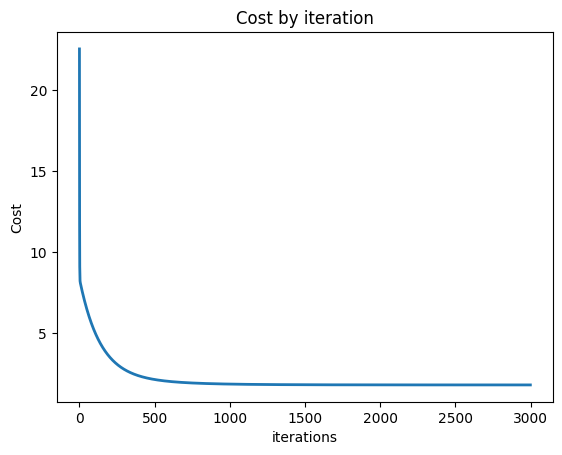

In [16]:
# plot the error
plt.plot(range(n_iters), errors, linewidth=2)
plt.title("Cost by iteration")
plt.ylabel("Cost")
plt.xlabel("iterations")

In [17]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [20]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x[:2])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

w = [0.3, 0.9]
b = -0.4

X, y = data, labels
Z = [weighted_sum(x, w, b) for x in X]
y_pred = [sigmoid(z) for z in Z]

# evaluate error
error = cost_function(y_pred, y)
print(error)

46.70281547651132


In [21]:
W1 = np.random.randn(2, 4)
W2 = np.random.randn(3, 2)

print("W1=", W1)
print("W2=", W2)

W1= [[-0.31441202 -0.27668374 -2.14949241  0.02083281]
 [-0.66386408  0.37710875 -0.30142188 -0.06617699]]
W2= [[ 0.36704168 -0.01424328]
 [ 1.37017836 -1.70220979]
 [ 2.44916222 -0.21374093]]


In [ ]:
X, y = data, labels
W1 = W1.reshape(X.shape[1], -1)
z = np.dot(X, W1)
z = sigmoid(z)

W2 = W2.reshape(z.shape[1], -1)
y_pred = np.dot(z, W2)

# what is our cost
error = cost_function(y_pred, y)

print('predicted %0.2f for example 0, actual %0.2f, total cost %0.2f'%(pred_y[0], y[0], error))

In [23]:
class Neural_Network(object):
    def __init__(self, n0, n1, n2):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2

        # initialize weights
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)

    def predict(self, x):
        z = np.dot(x, self.W1)
        z = sigmoid(z)
        y = np.dot(z, self.W2)
        return y


In [34]:
# Assuming 'Neural_Network' class is already defined (e.g., in a previous cell)
X, y = data, labels

# Instantiate the Neural_Network class
net = Neural_Network(n0=X.shape[1], n1=3, n2=1) # Example: n1=3, n2=1 - Adjust as needed

y_pred = net.predict(X)
error = cost_function(y_pred, y)

print('predicted %0.2f for example 0, actual %0.2f, total cost %0.2f'%(pred_y[0], y[0], error))

predicted 3.96 for example 0, actual 0.20, total cost 9622.87


In [26]:
def get_gradient(net, X, y):
    w_delta = 1e-8

    # get the current value of the loss, wherever the parameters are
    y_pred_current = net.predict(X)
    error_current = cost_function(y_pred_current, y)

    # grab the current weights and copy them (so we can restore them after modification)
    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2)

    # Calculate gradient for the first layer
    for i in range(net.n0):
        for j in range(net.n1):
            net.W1 = np.copy(W1)
            net.W1[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw1[i][j] = (error - error_current) / w_delta

    # Calculate gradient for the second layer
    for i in range(net.n1):
        for j in range(net.n2):
            net.W2 = np.copy(W2)
            net.W2[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw2[i][j] = (error - error_current) / w_delta

    # restore the original weights
    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2

In [36]:
X, y = data, labels.reshape((len(labels),1))
X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)

net = Neural_Network(3, 3, 1)
y_orig = net.predict(X)
init_cost = cost_function(y_orig, y)
print("initial cost = %0.3f" % init_cost)
n_epochs = 2000
learning_rate = 0.01

errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = cost_function(y_pred, y)
    errors.append(error)

initial cost = 10.256


Text(0, 0.5, 'Error')

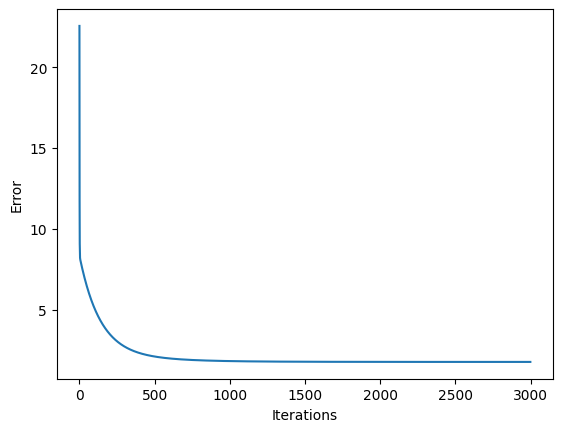

In [27]:
# plotting iterations vs error
plt.plot(range(0, len(errors)), errors)
plt.xlabel('Iterations')
plt.ylabel('Error')